#ASSIGNMENT 2

Epoch 1/590
5/5 [==============================] - 6s 271ms/step - loss: 0.1919 - val_loss: 0.0418
Epoch 2/590
5/5 [==============================] - 0s 70ms/step - loss: 0.0326 - val_loss: 0.0170
Epoch 3/590
5/5 [==============================] - 0s 70ms/step - loss: 0.0240 - val_loss: 0.0279
Epoch 4/590
5/5 [==============================] - 0s 72ms/step - loss: 0.0221 - val_loss: 0.0128
Epoch 5/590
5/5 [==============================] - 0s 69ms/step - loss: 0.0098 - val_loss: 0.0128
Epoch 6/590
5/5 [==============================] - 0s 67ms/step - loss: 0.0133 - val_loss: 0.0132
Epoch 7/590
5/5 [==============================] - 0s 71ms/step - loss: 0.0107 - val_loss: 0.0100
Epoch 8/590
5/5 [==============================] - 0s 65ms/step - loss: 0.0072 - val_loss: 0.0090
Epoch 9/590
5/5 [==============================] - 0s 67ms/step - loss: 0.0071 - val_loss: 0.0082
Epoch 10/590
5/5 [==============================] - 0s 80ms/step - loss: 0.0059 - val_loss: 0.0081
Epoch 11/590
5/5 [

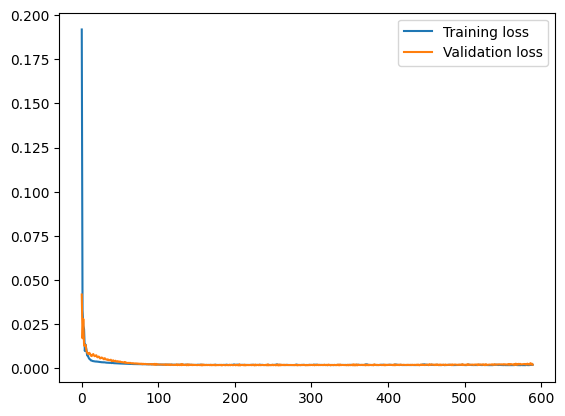

2/2 [==============================] - 1s 14ms/step


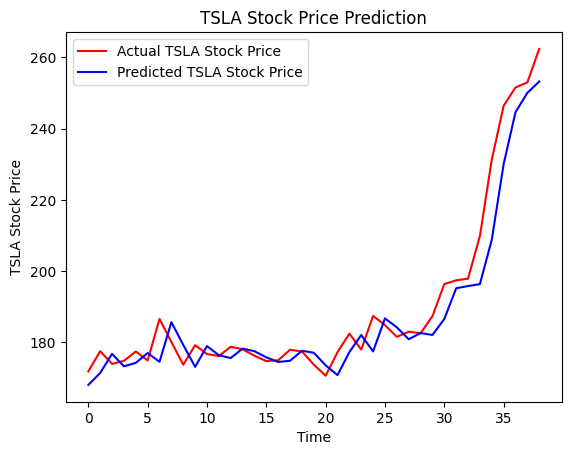

1/1 [==============================] - 0s 26ms/step


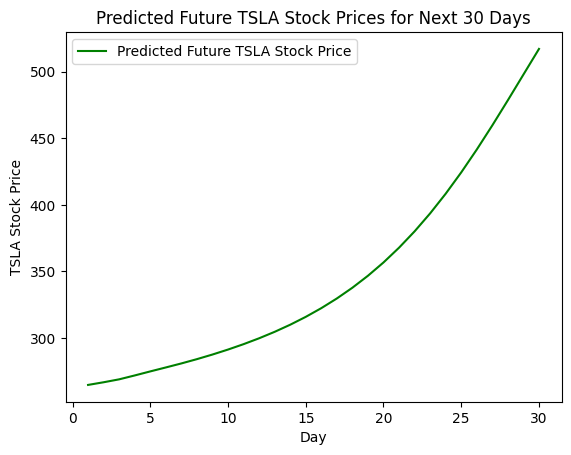

1/1 [==============================] - 0s 25ms/step
Predicted next day TSLA stock price: 264.8710021972656
1/1 [==============================] - 0s 26ms/step
Predicted TSLA stock prices for the next 7 days:
Day 1: 264.8710021972656
Day 2: 266.86749267578125
Day 3: 269.0658874511719
Day 4: 271.9757995605469
Day 5: 275.0121154785156
Day 6: 277.9743957519531
Day 7: 280.995361328125


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

#dataset
data = pd.read_csv('TSLA.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
close_prices = data['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        targets.append(data[i + sequence_length])
    return np.array(sequences), np.array(targets)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)
split_ratio = 0.8
split = int(split_ratio * len(X))
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]

# The GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(GRU(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
history = model.fit(X_train, y_train, epochs=590, batch_size=32, validation_data=(X_val, y_val))
# Evaluate the model
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()
predicted_prices = model.predict(X_val)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_val.reshape(-1, 1))

plt.plot(actual_prices, color='red', label='Actual TSLA Stock Price')
plt.plot(predicted_prices, color='blue', label='Predicted TSLA Stock Price')
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TSLA Stock Price')
plt.legend()
plt.show()
last_sequence = scaled_data[-sequence_length:]
future_prices = []

for _ in range(30):
    new_prediction = model.predict(last_sequence.reshape(1, sequence_length, 1))
    future_prices.append(new_prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], new_prediction, axis=0)

future_prices = scaler.inverse_transform(np.array(future_prices).reshape(-1, 1))

plt.plot(range(1, 31), future_prices, color='green', label='Predicted Future TSLA Stock Price')
plt.title('Predicted Future TSLA Stock Prices for Next 30 Days')
plt.xlabel('Day')
plt.ylabel('TSLA Stock Price')
plt.legend()
plt.show()
#Predicting future stock prices
last_sequence = scaled_data[-sequence_length:]
next_day_price = model.predict(last_sequence.reshape(1, sequence_length, 1))
next_day_price = scaler.inverse_transform(next_day_price)[0, 0]

print(f"Predicted next day TSLA stock price: {next_day_price}")

# Predicting the next week's prices
future_prices = []
for _ in range(7):
    new_prediction = model.predict(last_sequence.reshape(1, sequence_length, 1))
    future_prices.append(new_prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], new_prediction, axis=0)

future_prices = scaler.inverse_transform(np.array(future_prices).reshape(-1, 1))

# Print the predicted prices for the next 7 days
print("Predicted TSLA stock prices for the next 7 days:")
for i, price in enumerate(future_prices, start=1):
    print(f"Day {i}: {price[0]}")


